Github: https://github.com/JaidedAI/EasyOCR

uggingface demo: https://huggingface.co/spaces/tomofi/EasyOCR

## 1. Install packages

In [38]:
!pip install easyocr matplotlib

## 2. Import packages

In [1]:
import time
import easyocr
import cv2
from matplotlib import pyplot as plt

languages = ["en"]
image_path = '../images/test_2.jpg'

## 3. Plot function

In [2]:
def plot_bbox(easy_ocr_result, image):
    boxes = [line[0] for line in easy_ocr_result]
    texts = [line[1] for line in easy_ocr_result]
    scores = [line[2] for line in easy_ocr_result]

    for box, text in zip(boxes, texts):
        top_left     = (int(box[0][0]), int(box[0][1]))
        bottom_right = (int(box[2][0]), int(box[2][1]))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image, boxes, texts, scores

## 4. Run EasyOCR

### 4.1 Using CPU

In [3]:
CPU_READER = easyocr.Reader(languages, gpu=False)

start = time.time()
cpu_result = CPU_READER.readtext(image_path)
print("Time taken to read text from image using CPU: ", time.time() - start)

Using CPU. Note: This module is much faster with a GPU.


Time taken to read text from image using CPU:  6.928359270095825


### 4.2 Using GPU

In [4]:
GPU_READER = easyocr.Reader(languages, gpu=True)

start = time.time()
gpu_result = GPU_READER.readtext(image_path)
print("Time taken to read text from image using CPU: ", time.time() - start)

Time taken to read text from image using CPU:  1.0843946933746338


## 4. Show result

In [5]:
origin_image = cv2.imread(image_path)
image, boxes, texts, scores = plot_bbox(cpu_result, origin_image)

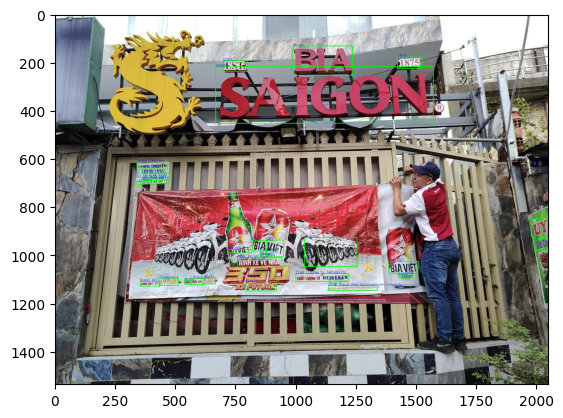

In [6]:
plt.imshow(image)

In [7]:
for box, text, score in zip(boxes, texts, scores):
    print(f"Text: {text}, Score: {score}")

Text: ESD, Score: 0.7447819975937604
Text: Bi-A, Score: 0.6459352374076843
Text: 1875, Score: 0.9282318243110987
Text: AHGUn, Score: 0.09067711800015663
Text: NHAN CHUYEN, Score: 0.8878991358260758
Text: NHA TRQ, Score: 0.6828308506399526
Text: E TuA AE 3 cic, Score: 0.07688182320785412
Text: GI Sinh Vien, Score: 0.4013565160981324
Text: LH:, Score: 0.9315143246582124
Text: [48 0572, Score: 0.7633258851536647
Text: Uy, Score: 0.3031687540217863
Text: BIA, Score: 0.9303966943904055
Text: @l, Score: 0.32784165926059144
Text: RINA XE VE NHA, Score: 0.4682581854762824
Text: @cgooo, Score: 0.026488699539864626
Text: BIA VIET , Score: 0.5145728595495334
Text: Bnw, Score: 0.34918457532506575
Text: "J0 IU , Score: 0.01926479790276257
Text: ChAt LUQNe Tu 'HEINEKEN, Score: 0.3247392584779221
Text: HanG MG)'] S1t, Score: 0.026426171709463275
Text: "Luduuuu), Score: 0.34203023343990774
Text: Wans, Score: 0.17871186137199402
Text: ; Triku GuI, Score: 0.10563917241914147
Text: VicTNAM, Score: 0.1389